In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
from glob import glob
import os

In [2]:
labels_df = pd.read_csv("../input/train_v2.csv")
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [3]:
# Build list with unique labels
label_list = []
for tag_str in labels_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [4]:
# Add onehot features for every label
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
labels_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [5]:
img = cv2.imread('../input/train-jpg/'+ labels_df.ix[0]['image_name'] +'.jpg')
print(img.shape)

(256, 256, 3)


In [6]:
label_list = np.array(label_list)
print(label_list)
print(len(labels_df))

['haze' 'primary' 'agriculture' 'clear' 'water' 'habitation' 'road'
 'cultivation' 'slash_burn' 'cloudy' 'partly_cloudy' 'conventional_mine'
 'bare_ground' 'artisinal_mine' 'blooming' 'selective_logging' 'blow_down']
40479


In [7]:
x = []
y = []
n = []
for i in range( len(labels_df) ): #len(labels_df):
    img = cv2.imread('../input/train-jpg/'+ labels_df.ix[i]['image_name'] +'.jpg')
    
    x.append(img[16:240,16:240])
    n.append(labels_df.ix[i]['image_name'] +'.jpg')
    
    class_labels = []
    for j in range(17):
        class_labels.append(labels_df.ix[i][(j+2)])
    y.append(np.array(class_labels))

x = np.array(x)
y = np.array(y)
n = np.array(n)

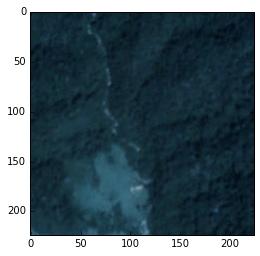

In [8]:
plt.imshow(x[4])


In [9]:
print(x.shape)
print(y.shape)

(40479, 224, 224, 3)
(40479, 17)


In [10]:
np.savez('224.npz', x=x, y=y, label=label_list)